<a href="https://colab.research.google.com/github/ProgMahabub21/Python-Final/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Serial                          Name Age      Unit  \
0  2.                        W/O LAC MD RAJU  25   BAF MTR   
1  3.                  SGT MD SHORIFUL ISLAM  35  8 FD R/A   
2  4.           WO (MODC) RETD) MD SHAJAHAN   52   BAF R/W   
3  5.                  SNK MD FAHIM HOSSAIN   20     9 EBR   
4  6.                    NCE NIRMOL  CHANDRA  28     9 EBR   

                                  Name of Disease        Date of Admission   \
0                                        COVID-19       2020-04-26 00:00:00   
1                                        COVID-19       2020-05-19 00:00:00   
2  COVID – 19 WITH ACUTE ISCHAEMIC STROKE (LT) HP  "5/23/2020  12:00:00" AM   
3                                       COVID -19       2020-05-23 00:00:00   
4                                       COVID -19       2020-05-23 00:00:00   

  Status Date of Discharge Date of Expired   S1: Fever  S2: Cough  \
0      0               NaT              NaT        0.0        0.0   
1      0      

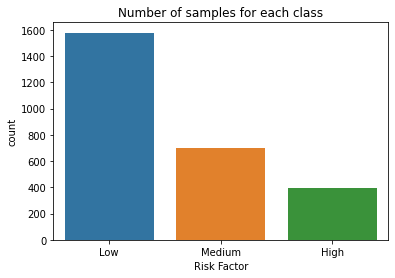

                          Age  Status  S1: Fever  S2: Cough  S3: Joint Pain  \
Age                      1.00    0.28      -0.02      -0.02           -0.01   
Status                   0.28    1.00       0.02       0.05            0.05   
S1: Fever               -0.02    0.02       1.00      -0.00            0.01   
S2: Cough               -0.02    0.05      -0.00       1.00           -0.00   
S3: Joint Pain          -0.01    0.05       0.01      -0.00            1.00   
S4: Shortness of Breath  0.01    0.02       0.00      -0.00           -0.00   
Test2:RT PCR             0.06    0.26       0.01       0.04            0.15   
Test3: Chest X Ray       0.17    0.59       0.01       0.04            0.02   
Test4: CT Scan           0.24    0.78      -0.01       0.04            0.03   

                         S4: Shortness of Breath  Test2:RT PCR  \
Age                                         0.01          0.06   
Status                                      0.02          0.26   
S1: Fever  

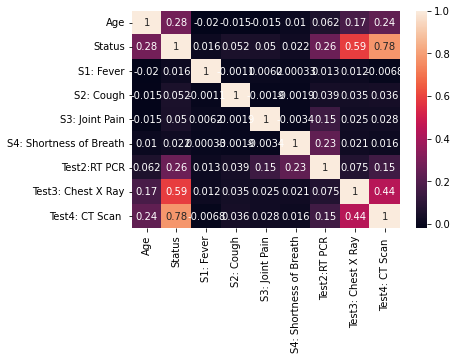

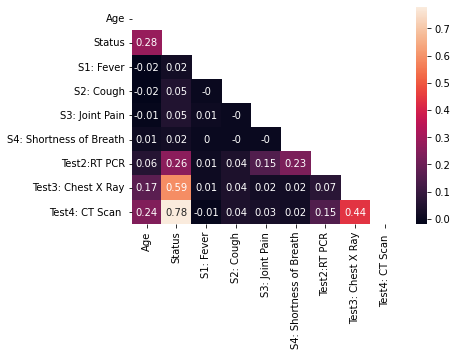

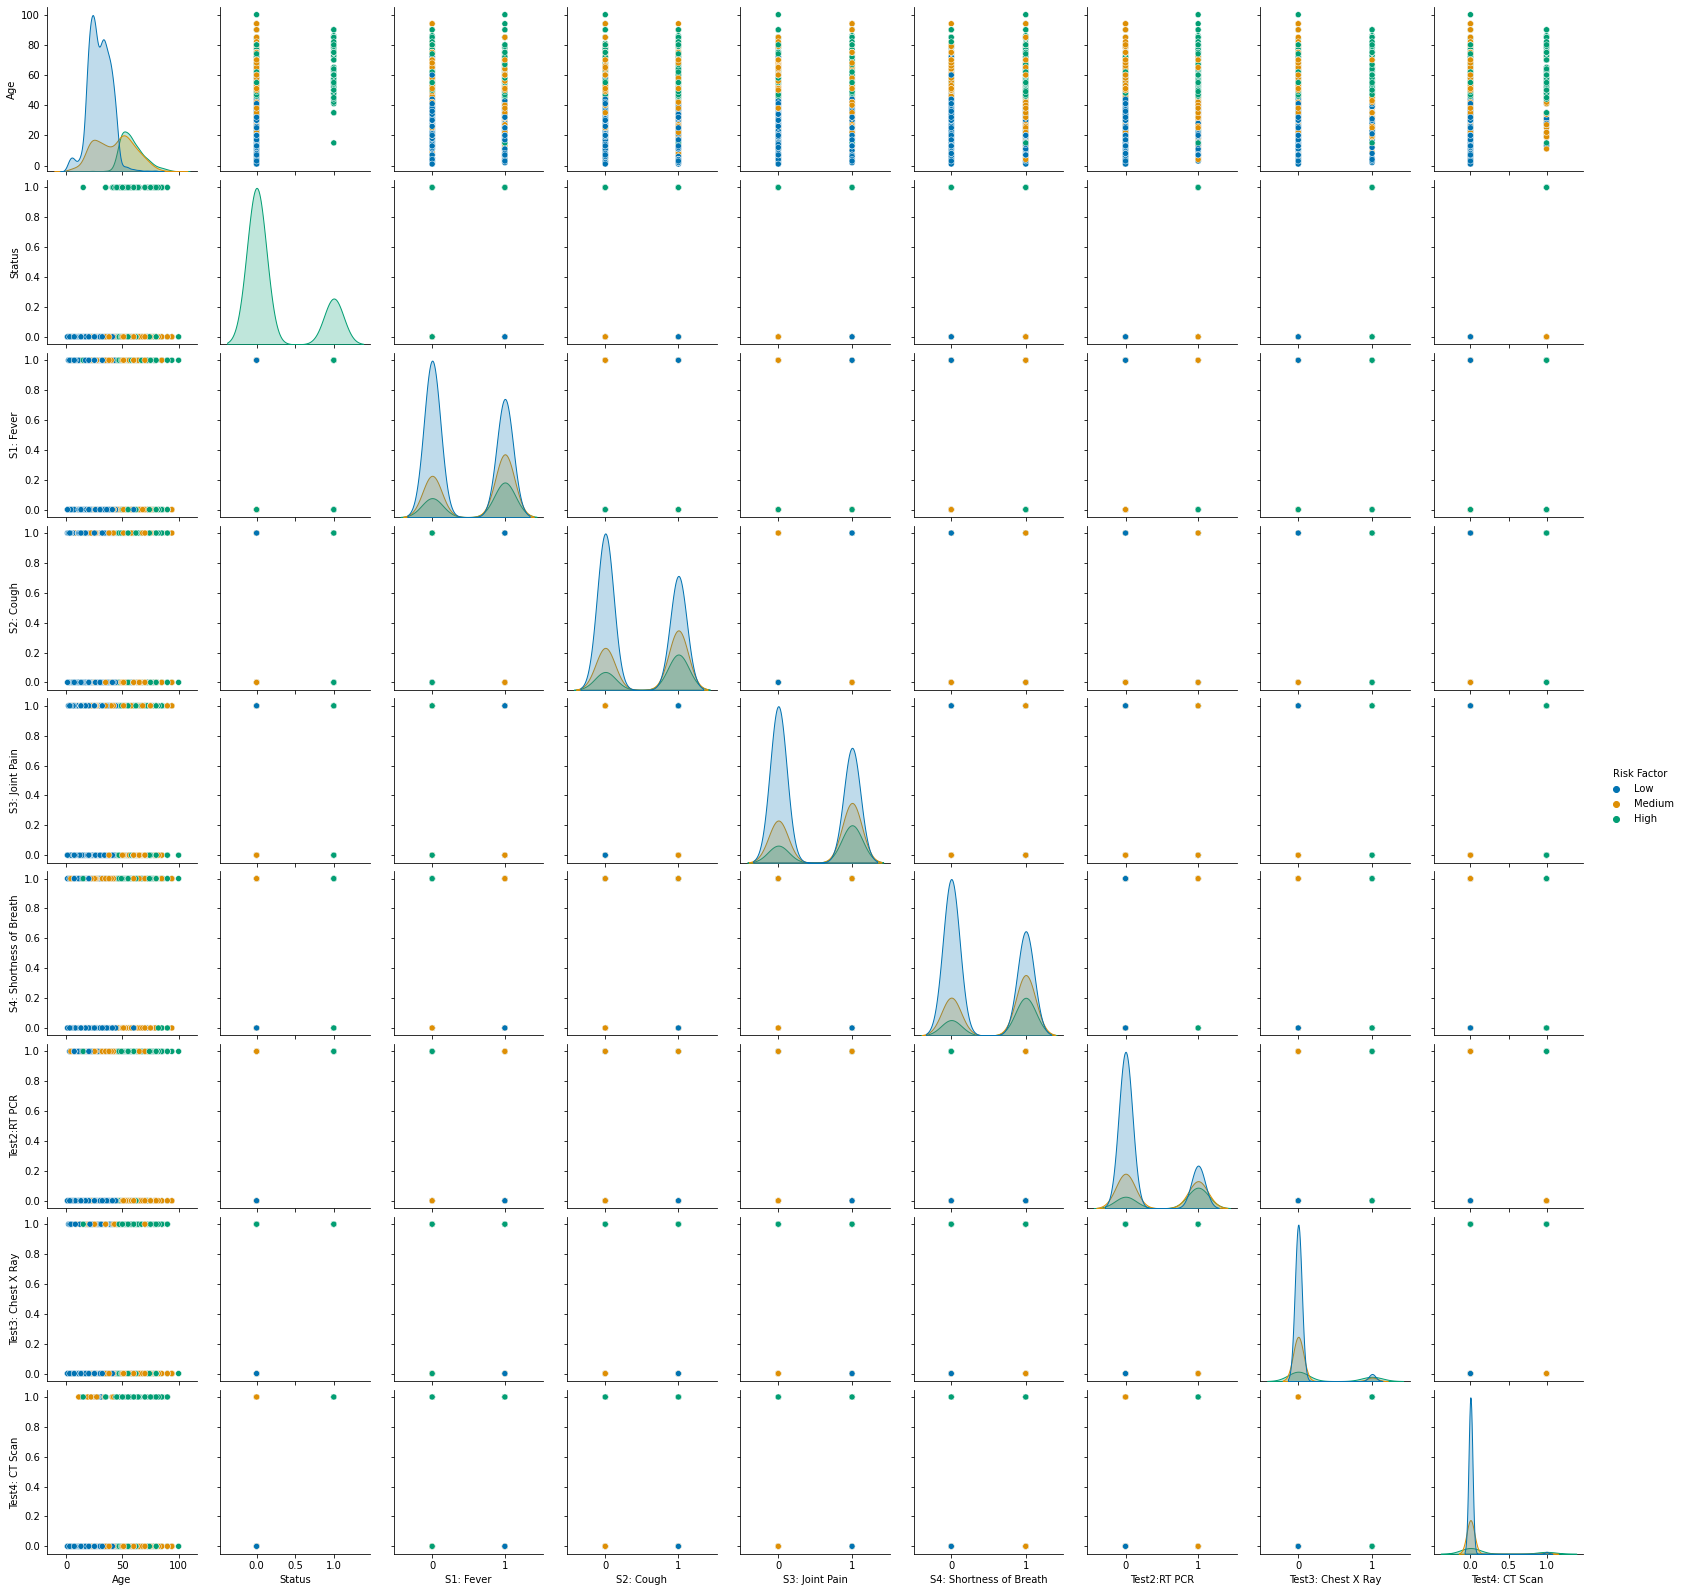

----------------- Feature Matrix -----------------
    Age  S1: Fever  S2: Cough  S3: Joint Pain  Status  Test2:RT PCR  \
0    25          0          0               0     0.0             0   
1    35          0          0               1     0.0             1   
13   20          1          1               1     0.0             1   
17   55          1          1               1     1.0             1   
19   40          0          1               0     0.0             1   

    Test3: Chest X Ray  Test4: CT Scan   
0                    0                0  
1                    0                0  
13                   0                0  
17                   1                1  
19                   0                0  
----------------- Target Matrix -----------------
0        Low
1        Low
13    Medium
17      High
19       Low
Name: Risk Factor, dtype: object
X_train shape:  (1920, 8)
X_test shape:  (747, 8)
y_train shape:  (1920,)
y_test shape:  (747,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------
Accuracy score of SVM:  0.7242
----------------------------------------
Accuracy score of Naive Bayes:  0.7122
----------------------------------------
Accuracy score of KNN:  0.8139
----------------------------------------
Accuracy score of Logistic Regression:  0.7992
----------------------------------------
Accuracy score of Decision Tree:  0.8782
----------------------------------------
The accuracy scores of different Models:
----------------------------------------
SVM : 0.7242
Naive Bayes : 0.7122
KNN : 0.8139
Logistic Regression : 0.7992
Decision Tree : 0.8782


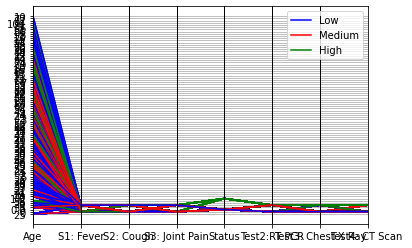

In [45]:
from typing_extensions import TypeVarTuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import parallel_coordinates

# read excel file and create pandas dataframe
df = pd.read_excel('Final-Data-COVID-PATIENT-STATE-2020-2022-dirty-data2.xlsx')


# --------- data preprossesing (e.g. data cleaning) -------------


# print the view of the dataframe
print(df.head())

# print info
print(df.info())


# cleaning the data process is done here
# it will follow four steps

# 1. drop the rows that are not needed (have missing status values) as sensitive data so we can't fill it with mean or mode
df.dropna(subset=['Status'], inplace=True)
df.dropna(subset=['Risk Factor'], inplace=True)
df.dropna(subset=['S1: Fever'], inplace=True)
df.dropna(subset=['S2: Cough'], inplace=True)
df.dropna(subset=['S3: Joint Pain'], inplace=True)
df.dropna(subset=['S4: Shortness of Breath'], inplace=True)
df.dropna(subset=['Test1: RAT'], inplace=True)
df.dropna(subset=['Test2:RT PCR'], inplace=True)
df.dropna(subset=['Test3: Chest X Ray'], inplace=True)
df.dropna(subset=['Test4: CT Scan '], inplace=True)


# after step 1 15 data rows are dropped

# 2 Cleaning wrong data format
# convert age column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Status'] = pd.to_numeric(df['Status'],errors='coerce')
df['Date of Admission '] = pd.to_datetime(
    df['Date of Admission '], errors='coerce')
df['Date of Discharge'] = pd.to_datetime(
    df['Date of Discharge'], errors='coerce')
df['Date of Expired '] = pd.to_datetime(
    df['Date of Expired '], errors='coerce')
# check if age is numeric or drop the row


df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['Status'],inplace= True)
df.dropna(subset=['Date of Admission '], inplace=True)


# after step 2 115 more data rows are dropped


# 4. drop the rows that have duplicate values

df.drop_duplicates(inplace=True)


# convert all column to integer
df['Age'] = df['Age'].astype(int)
df['S1: Fever'] = df['S1: Fever'].astype(int)
df['S2: Cough'] = df['S2: Cough'].astype(int)
df['S3: Joint Pain'] = df['S3: Joint Pain'].astype(int)
df['Test2:RT PCR'] = df['Test2:RT PCR'].astype(int)
df['Test3: Chest X Ray'] = df['Test3: Chest X Ray'].astype(int)
df['Test4: CT Scan '] = df['Test4: CT Scan '].astype(int)


# print(df.head())
# print(df.info())

# Exploratory Data Analysis
print("----------------- Data Frame -----------------")
print(df.describe())
print("----------------- Group by Risk Factor -----------------")
print(df.groupby('Risk Factor').size())

# # remove unnecessary columns
df.drop(['Date of Admission ', 'Date of Discharge',
         'Date of Expired ', 'Test1: RAT'], axis=1, inplace=True)


# ---------------- Exploratory data analysis -----------------

# let's visualise the number of samples for each class with count plot
sns.countplot(x='Risk Factor', data=df)
plt.title('Number of samples for each class')
plt.show()

# calculate the correlation between variables
corr = df.corr().round(2)
print(corr)
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()

# remove redundant values
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True)
plt.show()


# # let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(df, hue='Risk Factor', height=2.5, palette='colorblind')
plt.show()

# parallel_coordinates(df, 'Risk Factor', colormap='rainbow')
df1 = df[['Age', 'S1: Fever', 'S2: Cough', 'S3: Joint Pain','Status',
        'Test2:RT PCR','Test3: Chest X Ray', 'Test4: CT Scan ','Risk Factor']]
df1 = df1.astype(str)
parallel_coordinates(df1, "Risk Factor", color = ['blue', 'red', 'green'])

# Feature matrix

X = df[['Age', 'S1: Fever', 'S2: Cough', 'S3: Joint Pain','Status',
        'Test2:RT PCR','Test3: Chest X Ray', 'Test4: CT Scan ']]



print("----------------- Feature Matrix -----------------")
print(X.head())

y = df['Risk Factor']
print("----------------- Target Matrix -----------------")
print(y.head())

# ------------------ Model Training ------------------


# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.28, random_state=16)


print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

score = {}
# define models

model_svm = svm.SVC()
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()


model_svm.fit(X_train, y_train)
model_nb.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_test, y_pred_svm).round(4)
score["SVM"] = score_svm

y_pred_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_test, y_pred_nb).round(4)
score["Naive Bayes"] = score_nb

y_pred_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_test, y_pred_knn).round(4)
score["KNN"] = score_knn

y_pred_lr = model_lr.predict(X_test)
score_lr = metrics.accuracy_score(y_test, y_pred_lr).round(4)
score["Logistic Regression"] = score_lr

y_pred_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_test, y_pred_dt).round(4)
score["Decision Tree"] = score_dt

print("----------------------------------------")
print("Accuracy score of SVM: ", score_svm)
print("----------------------------------------")
print("Accuracy score of Naive Bayes: ", score_nb)
print("----------------------------------------")
print("Accuracy score of KNN: ", score_knn)
print("----------------------------------------")
print("Accuracy score of Logistic Regression: ", score_lr)
print("----------------------------------------")
print("Accuracy score of Decision Tree: ", score_dt)
print("----------------------------------------")

print("The accuracy scores of different Models:")
print("----------------------------------------")
for key, value in score.items():
    print(key, ":", value)